영상 R의 크기: (6, 21)
푸리에 변환 결과 t의 크기: (6, 21)
특징 벡터 X: [15562.             0.          -217.17380649  1163.51267527
   942.91709352  -272.29742762  -211.37500952   190.57558833
   -41.66718866  -694.96273937]
특징 벡터 X의 길이: 10


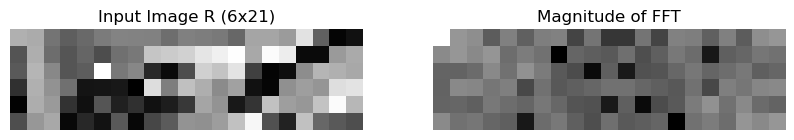

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 1. 이미지 로드 (OpenCV 사용)
# 이미지 경로를 지정하세요 (예: 'image.jpg')
image_path = './image/babbon.bmp'  # 실제 이미지 경로로 변경
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # 그레이스케일로 로드

# 이미지가 제대로 로드되었는지 확인
if image is None:
    print("이미지를 로드할 수 없습니다. 경로를 확인하세요.")
    exit()

# 2. 영상 R을 크기 (6, 21)로 변환
# OpenCV는 uint8 타입으로 이미지를 로드하므로 float32로 변환
R = cv2.resize(image, (21, 6)).astype(np.float32)  # 크기 (6, 21)로 리사이즈

# 3. 2D FFT 수행
# NumPy의 fft2를 사용해 2D 푸리에 변환 수행
t = np.fft.fft2(R)

# 4. 특징 벡터 X 생성
# 필요한 특징 개수 2d를 설정 (예: d=5로 설정, 따라서 2d=10)
d = 5  # 예시로 d를 5로 설정
X = []

# t를 1D 배열로 변환 (ravel 사용)
t_flat = t.ravel()

# 실수부와 허수부를 추출해 X 생성
for i in range(d):
    real_part = np.real(t_flat[i])
    imag_part = np.imag(t_flat[i])
    X.append(real_part)
    X.append(imag_part)

X = np.array(X)  # 특징 벡터 X

# 5. 결과 출력
print(f"영상 R의 크기: {R.shape}")
print(f"푸리에 변환 결과 t의 크기: {t.shape}")
print(f"특징 벡터 X: {X}")
print(f"특징 벡터 X의 길이: {len(X)}")

# 6. 시각화 (Matplotlib 사용)
# 원본 영상 R 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(R, cmap='gray')
plt.title('Input Image R (6x21)')
plt.axis('off')

# 푸리에 변환 결과의 크기(절대값) 시각화
plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(t) + 1), cmap='gray')  # 로그 스케일로 시각화
plt.title('Magnitude of FFT')
plt.axis('off')

plt.show()